In [350]:
import pandas as pd
import numpy as np
ezh_pk='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE76nnn/GSE76626/suppl/GSE76626_ChIP-Seq_RPM.txt.gz' ## hg38
data='/labs/mpsnyder/moqri/data/index/'
def lift(dg,pre):
    dg['chr']=dg.index.str.split('.').str[0]
    dg['base']=dg.index.str.split('.').str[1]
    dg['base2']=dg['base']
    dg=dg[list(dg.columns[-3:])+(list(dg.columns[:-3]))]
    #dg=dg.fillna('n')
    dg.to_csv(data+'hg19_mono.txt',index=None,header=None,sep='\t')
    !CrossMap.py bed hg19ToHg38.over.chain.gz {data}hg19_mono.txt {data}hg38_mono.txt
    df=pd.read_table(data+'hg38_mono.txt',header=None,names=['chr','b1','b2',pre+'1',pre+'2',pre+'3',pre+'4'])
    return df

In [2]:
df=pd.read_table('ezh2_19',header=None)
df['ind']=df[0].astype(str)+'_'+df[1].astype(str)
ll=df.ind.values

In [162]:
#!wget https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.OD20.mincov0.txt -P "{data}/rrbs"
    

In [329]:
dfs=[]
for i in list(range(1,13))+list(range(14,22)):
    dfs.append(pd.read_table(data+'rrbs/methylcall.CpG.YD'+str(i)+'.mincov0.txt',index_col=0,nrows=10000000))
    print(i,end=',')

1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,

In [330]:
inds=[]
for i in range(20):
    print(i,end=',')
    df=dfs[i]
    df['g']=df.chr.str[3:]+'_'+df.base.astype(str)
    df=df[df.g.isin(ll)]
    inds.append(df.index)
    dfs[i]=df

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

In [331]:
inds=set().union(*inds)
len(inds)

16042

In [332]:
for i in range(20):
    df=dfs[i]
    df['m_'+str(i)]=df.freqC*df.coverage/100
    df['u_'+str(i)]=df.freqT*df.coverage/100
    df=df.drop(['chr','base','strand','coverage','freqC','freqT'],1)
    dfs[i]=df

<ipython-input-332-190c21b4a9f3>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(['chr','base','strand','coverage','freqC','freqT'],1)


In [333]:
dg=pd.DataFrame()
dg.index=inds

In [334]:
for i in range(20):
    df=dfs[i]
    dg=dg.merge(dfs[i].drop('g',1),left_index=True,right_index=True,how='left')
dg.shape

<ipython-input-334-898bac75baa2>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dg=dg.merge(dfs[i].drop('g',1),left_index=True,right_index=True,how='left')


(16042, 40)

In [335]:
dg=dg.round(0)

In [336]:
for i in range (4):
    m=dg['m_'+str(5*i)]+dg['m_'+str(5*i+1)]+dg['m_'+str(5*i+2)]+dg['m_'+str(5*i+3)]+dg['m_'+str(5*i+4)]
    u=dg['u_'+str(5*i)]+dg['u_'+str(5*i+1)]+dg['u_'+str(5*i+2)]+dg['u_'+str(5*i+3)]+dg['u_'+str(5*i+4)]
    dg['b_'+str(i)]=m/(m+u)

In [337]:
dg=dg[['b_'+str(i) for i in range(4)]]

In [326]:
dg.dropna().mean().sort_values()

b_2    0.026474
b_1    0.027695
b_0    0.028401
b_3    0.028484
dtype: float64

In [327]:
dg.to_csv(data+'rrbs/old5.csv')

In [338]:
dg.dropna().mean().sort_values()

b_3    0.023974
b_2    0.023975
b_0    0.024633
b_1    0.026444
dtype: float64

In [339]:
dg.to_csv(data+'rrbs/young5.csv')

In [353]:
o=pd.read_csv(data+'rrbs/old5.csv',index_col=0)
o=lift(o,'o')
print(o.shape)
y=pd.read_csv(data+'rrbs/young5.csv',index_col=0)
y=lift(y,'y')
print(y.shape)

2021-11-20 07:23:19 [INFO]  Read the chain file "hg19ToHg38.over.chain.gz" 
(15360, 7)
2021-11-20 07:23:20 [INFO]  Read the chain file "hg19ToHg38.over.chain.gz" 
(16042, 7)


In [354]:
y.index=y.chr.str[3:]+'_'+y.b1.astype(str)
y=y.drop(['chr','b1','b2'],1)

<ipython-input-354-415dc8e981bb>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  y=y.drop(['chr','b1','b2'],1)


In [355]:
o.index=o.chr.str[3:]+'_'+o.b1.astype(str)
o=o.drop(['chr','b1','b2'],1)

<ipython-input-355-b8f91946ca21>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  o=o.drop(['chr','b1','b2'],1)


In [356]:
df38=y.merge(o,left_index=True,right_index=True)
df38.shape

(13835, 8)

In [357]:
df=pd.read_csv('ezs.csv',index_col=0)
df.shape

(210130, 10)

In [358]:
df38=df38.merge(df[['d','dq']],left_index=True,right_index=True)
df38.shape

(13826, 10)

In [359]:
df38['dq']=pd.qcut(df38.d,5)

In [362]:
df38=df38.replace('n',np.nan)
for i in range(1,5):
    df38['y'+str(i)]=df38['y'+str(i)].astype(float)

<ipython-input-363-b003429d8a8f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df38.drop('d',1).dropna().groupby('dq').mean().plot()


<AxesSubplot:xlabel='dq'>

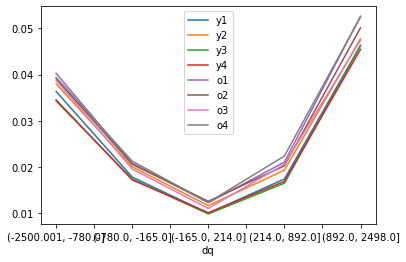

In [363]:
df38.drop('d',1).dropna().groupby('dq').mean().plot()

In [349]:
df38.drop('d',1).dropna().groupby('dq').mean()

<ipython-input-349-abdaeb648927>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df38.drop('d',1).dropna().groupby('dq').mean()


,y1,y2,y3,y4,y5,o1,o2,o3,o4,o5
dq,,,,,,,,,,
"(-2500.001, -780.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(-780.0, -165.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(-165.0, 214.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(214.0, 892.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(892.0, 2498.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
